بخش اول: فواصل اطمینان چند متغیره
مقدمه و تئوری
محققان و تحلیلگران اغلب در مباحث آمار و داده کاوی از عبارت 

فاصله اطمینان (Confidence Interval) استفاده می‌کنند تا نشان دهند که تقریباً مطمئن هستند یک فاصله یا محدوده‌ای، شامل پارامتر مورد نظر جامعه است. برای ساخت این فاصله، ابتدا باید یک 

کمیت محوری (Pivotal Quantity) تعریف کرد. کمیت محوری تابعی از نمونه تصادفی و پارامترهاست که توزیع آن به پارامترهای مجهول بستگی ندارد.

ناحیه اطمینان برای بردار میانگین:
برای بردار میانگین یک توزیع نرمال p-متغیره، از آماره 

T² هتلینگ برای ساخت ناحیه اطمینان استفاده می‌شود. این ناحیه شامل تمام بردارهای میانگین μ است که در نابرابری زیر صدق می‌کنند:

$$
N(\overline{x}-\mu)'S^{-1}(\overline{x}-\mu) \le \frac{(N-1)p}{N-p}F_{p,N-p}
$$

انواع فواصل اطمینان:


فواصل اطمینان تکی (Simultaneous): برای هر مؤلفه میانگin به صورت جداگانه و بدون در نظر گرفتن همبستگی با سایر مؤلفه‌ها محاسبه می‌شود.

فواصل اطمینان همزمان (T-squared): این فواصل با در نظر گرفتن ساختار همبستگی بین متغیرها ساخته می‌شوند و تضمین می‌کنند که همزمان تمام میانگین‌های واقعی با اطمینان مشخصی در بازه‌های خود قرار دارند. این بازه‌ها معمولاً از فواصل تکی پهن‌تر هستند.


فواصل اطمینان بونفرونی (Bonferroni): این روش یک حد وسط بین دو روش قبلی است و برای تعداد محدودی از مقایسه‌های همزمان به کار می‌رود. این فواصل از فواصل T-squared باریک‌تر اما از فواصل تکی پهن‌تر هستند.

بخش دوم: تحلیل مؤلفه‌های اصلی (PCA) و رگرسیون مؤلفه‌های اصلی (PCR)
تحلیل مؤلفه‌های اصلی (PCA)
مقدمه و تئوری
تحلیل مؤلفه‌های اصلی (PCA) روشی برای کاهش بعد (Dimension Reduction) است. هدف اصلی آن، تبدیل مجموعه‌ای از متغیرهای همبسته به مجموعه‌ای جدید از متغیرهای ناهمبسته (متعامد) به نام 

مؤلفه‌های اصلی است.



اولین مؤلفه اصلی، ترکیبی خطی از متغیرهای اولیه است که بیشترین واریانس داده‌ها را در خود جای داده است.


دومین مؤلفه اصلی، بیشترین واریانس باقی‌مانده را توضیح می‌دهد و بر اولین مؤلفه عمود (ناهمبسته) است.

این فرآیند از طریق 

تجزیه مقدار ویژه (Eigenvalue Decomposition) ماتریس کوواریانس یا همبستگی داده‌ها انجام می‌شود. واریانس هر مؤلفه اصلی برابر با مقدار ویژه متناظر آن است.

پیاده‌سازی در R (مثال داده‌های mtcars)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

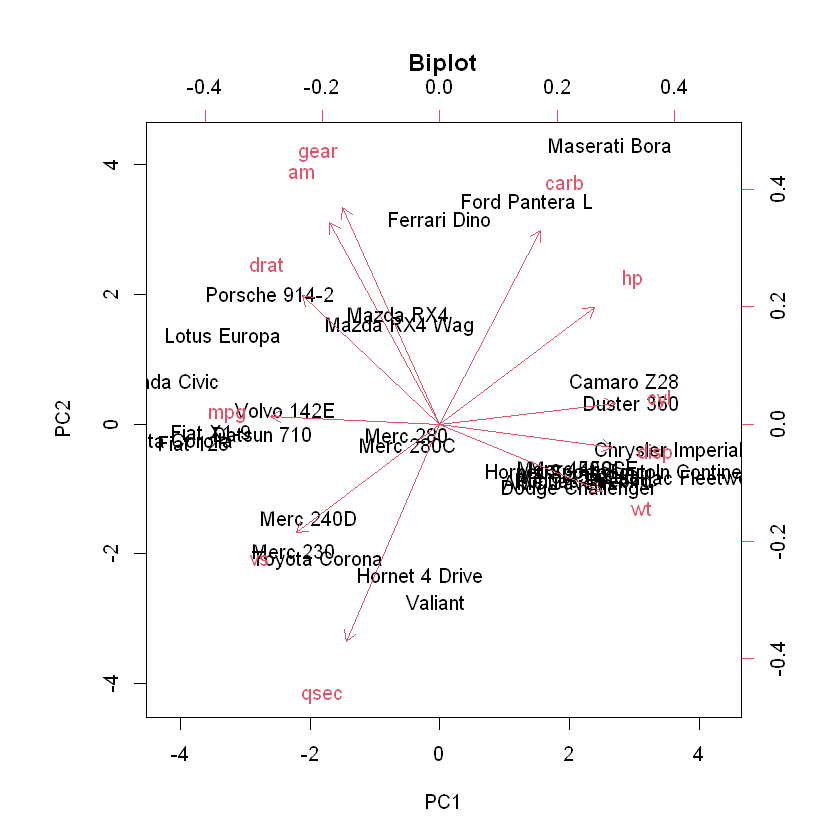

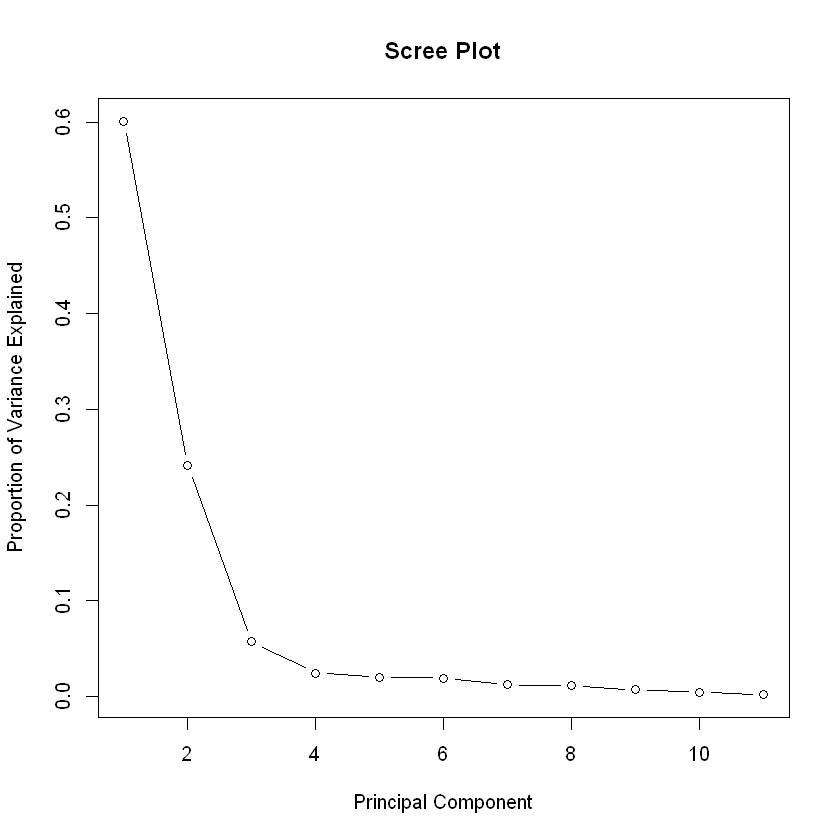

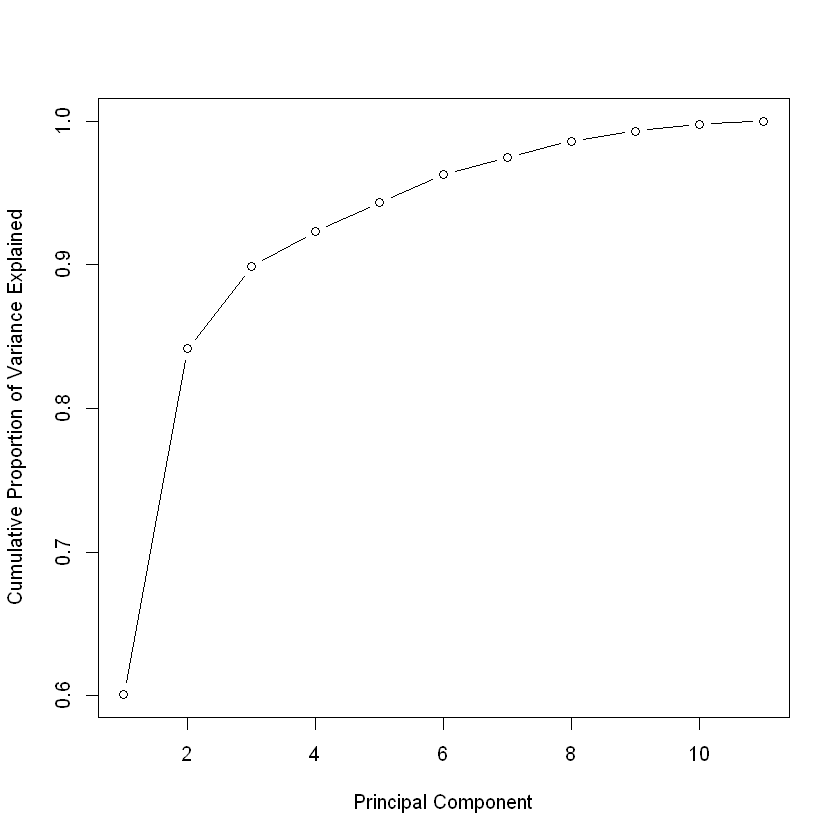

In [15]:
# فراخوانی کتابخانه و دیتاست
library(dplyr)
data(mtcars)

# انجام تحلیل مولفه‌های اصلی
# scale=TRUE داده‌ها را استاندارد می‌کند (میانگین صفر و واریانس یک)
my_pca <- prcomp(mtcars, scale = TRUE, center = TRUE)

# مشاهده خلاصه نتایج
summary(my_pca)

# رسم نمودار Biplot برای مشاهده رابطه متغیرها و مشاهدات با دو مولفه اول
biplot(my_pca, main = "Biplot", scale = 0)

# محاسبه واریانس هر مولفه
my_pca.var <- my_pca$sdev^2

# محاسبه نسبت واریانس توضیح داده شده توسط هر مولفه
prop_var_explained <- my_pca.var / sum(my_pca.var)

# رسم نمودار سنگ‌ریزه (Scree Plot) برای انتخاب تعداد مناسب مولفه‌ها
plot(prop_var_explained, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", type = "b", 
     main = "Scree Plot")

# رسم نمودار واریانس تجمعی
plot(cumsum(prop_var_explained), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", type = "b")

تحلیل: نمودار سنگ‌ریزه و واریانس تجمعی نشان می‌دهند که تقریباً ۹۰٪ از کل واریانس داده‌ها توسط ۴ مؤلفه اصلی اول توضیح داده می‌شود. این یعنی می‌توانیم ۱۱ متغیر اولیه را به ۴ مؤلفه کاهش دهیم بدون اینکه اطلاعات زیادی از دست برود.

رگرسیون مؤلفه‌های اصلی (PCR)
مقدمه و تئوری
وقتی متغیرهای پیش‌بین در یک مدل رگرسیونی دچار هم‌خطی (Collinearity) باشند، برآورد ضرایب مدل ناپایدار و غیرقابل اعتماد می‌شود. رگرسیون مؤلفه‌های اصلی (PCR) راهی برای حل این مشکل است. این روش در دو گام انجام می‌شود:


استخراج مؤلفه‌های اصلی از متغیرهای پیش‌بین (که ناهمبسته هستند).

انجام رگرسیون روی این مؤلفه‌ها به عنوان متغیرهای مستقل جدید.

پیاده‌سازی در R (مثال داده‌های mtcars)

Data: 	X dimension: 32 10 
	Y dimension: 32 1
Fit method: svdpc
Number of components considered: 10

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.123    2.686    2.689    2.482    2.526    2.566    2.694
adjCV        6.123    2.674    2.678    2.469    2.512    2.550    2.668
       7 comps  8 comps  9 comps  10 comps
CV       2.940    3.139    3.181     3.544
adjCV    2.899    3.087    3.129     3.455

TRAINING: % variance explained
     1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      57.60    84.10    90.07    92.77    94.99    97.09    98.42    99.23
mpg    82.53    82.63    85.40    85.41    85.47    85.56    85.58    85.85
     9 comps  10 comps
X      99.76     100.0
mpg    86.09      86.9


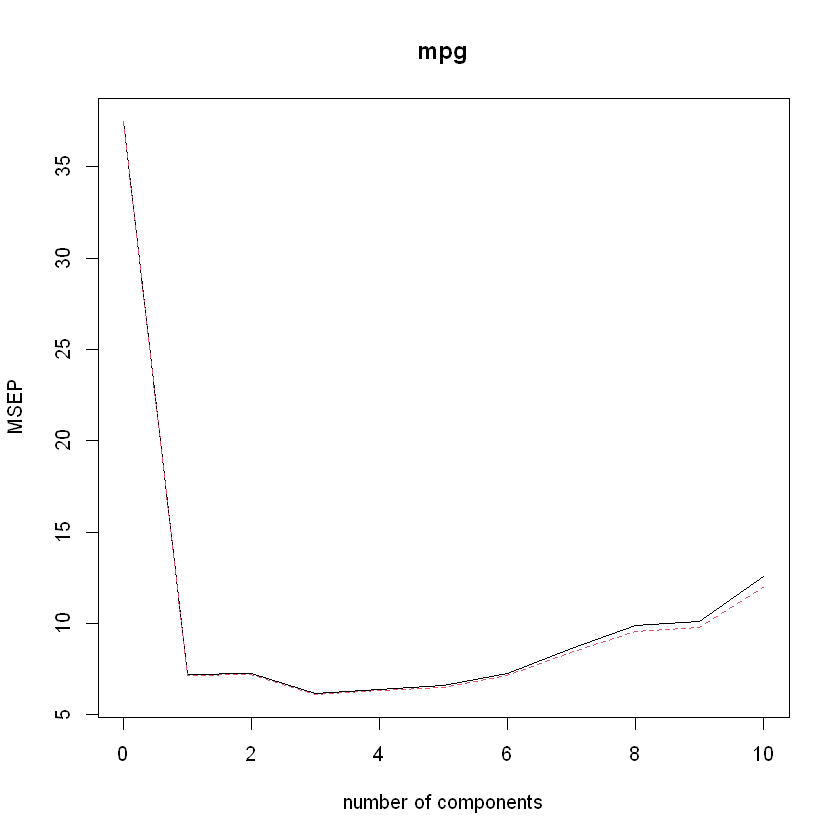

In [16]:
# فراخوانی کتابخانه pls
library(pls)

# ساخت مدل PCR با اعتبارسنجی متقابل (Cross-validation)
# متغیر پاسخ mpg و بقیه متغیرها پیش‌بین هستند
pcr_model <- pcr(mpg ~ ., data = mtcars, scale = TRUE, validation = "CV")

# مشاهده خلاصه مدل
summary(pcr_model)

# رسم نمودار برای انتخاب تعداد بهینه مولفه‌ها بر اساس خطای پیش‌بینی
validationplot(pcr_model, val.type = "MSEP")

تحلیل: نمودار MSEP (میانگین مربعات خطای پیش‌بینی) نشان می‌دهد که خطا با ۴ مؤلفه به کمترین میزان خود می‌رسد و پس از آن تغییر چشمگیری ندارد. بنابراین، استفاده از ۴ مؤلفه برای ساخت مدل رگرسیونی بهینه است.

بخش سوم: تحلیل عاملی اکتشافی (EFA)
مقدمه و تئوری
تحلیل عاملی (Factor Analysis) روشی برای شناسایی ساختارهای پنهان (Latent Variables or Factors) در داده‌هاست. فرض اصلی این است که همبستگی بین متغیرهای مشاهده‌شده، ناشی از چند عامل مشترک و غیرقابل مشاهده است. برخلاف PCA که هدفش حداکثر کردن واریانس است، هدف EFA توضیح دادن کوواریانس (همبستگی) بین متغیرهاست.


این روش دو نوع اصلی دارد:


تحلیل عاملی اکتشافی (EFA): زمانی که هیچ فرضیه قبلی در مورد ساختار عامل‌ها وجود ندارد و هدف کشف این ساختار است.


تحلیل عاملی تأییدی (CFA): زمانی که یک مدل نظری از قبل وجود دارد و هدف، آزمون کردن آن مدل با داده‌هاست.

پیاده‌سازی در R (مثال پرسشنامه)
قبل از تحلیل عاملی، باید از مناسب بودن داده‌ها اطمینان حاصل کرد:

آزمون آلفای کرونباخ: پایایی درونی گویه‌ها را می‌سنجد. مقدار بالای ۰.۷ قابل قبول است.

شاخص KMO: کفایت نمونه‌گیری را می‌سنجد. مقدار بالای ۰.۶ مناسب است.

آزمون کرویت بارتلت: فرض صفر "عدم همبستگی بین متغیرها" را آزمون می‌کند. برای انجام تحلیل عاملی، این فرض باید رد شود (p-value < 0.05).

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = my_data)
Overall MSA =  0.85
MSA for each item = 
  A1   A2   A3   A4   A5   C1   C2   C3   C4   C5   E1   E2   E3   E4   E5   N1 
0.75 0.84 0.87 0.88 0.90 0.84 0.80 0.85 0.83 0.86 0.84 0.88 0.90 0.88 0.89 0.78 
  N2   N3   N4   N5   O1   O2   O3   O4   O5 
0.78 0.86 0.89 0.86 0.86 0.78 0.84 0.77 0.76 

R was not square, finding R from data



$chisq
[1] 18146.07

$p.value
[1] 0

$df
[1] 300

Factor Analysis using method =  minres
Call: fa(r = my_data, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
     MR1   MR2   MR3    h2   u2 com
A1 -0.23  0.10 -0.01 0.062 0.94 1.4
A2  0.54  0.02  0.12 0.304 0.70 1.1
A3  0.64 -0.01  0.09 0.412 0.59 1.0
A4  0.41 -0.10  0.13 0.191 0.81 1.3
A5  0.64 -0.13  0.08 0.439 0.56 1.1
C1  0.10  0.03  0.59 0.359 0.64 1.1
C2  0.10  0.09  0.61 0.392 0.61 1.1
C3  0.09 -0.04  0.48 0.236 0.76 1.1
C4 -0.08  0.24 -0.62 0.449 0.55 1.3
C5 -0.16  0.30 -0.48 0.347 0.65 1.9
E1 -0.51  0.06  0.01 0.265 0.73 1.0
E2 -0.58  0.26 -0.11 0.421 0.58 1.5
E3  0.61  0.04  0.18 0.405 0.60 1.2
E4  0.68 -0.15  0.04 0.489 0.51 1.1
E5  0.47  0.04  0.36 0.351 0.65 1.9
N1 -0.06  0.74 -0.11 0.567 0.43 1.1
N2 -0.08  0.74 -0.06 0.557 0.44 1.0
N3 -0.05  0.74 -0.09 0.561 0.44 1.0
N4 -0.24  0.61 -0.15 0.449 0.55 1.4
N5 -0.07  0.51 -0.13 0.284 0.72 1.2
O1  0.25  0.05  0.31 0.160 0.84 2.0
O2  0.00  0.11 -0.29 0.097 0.90 1.3
O3  0.37

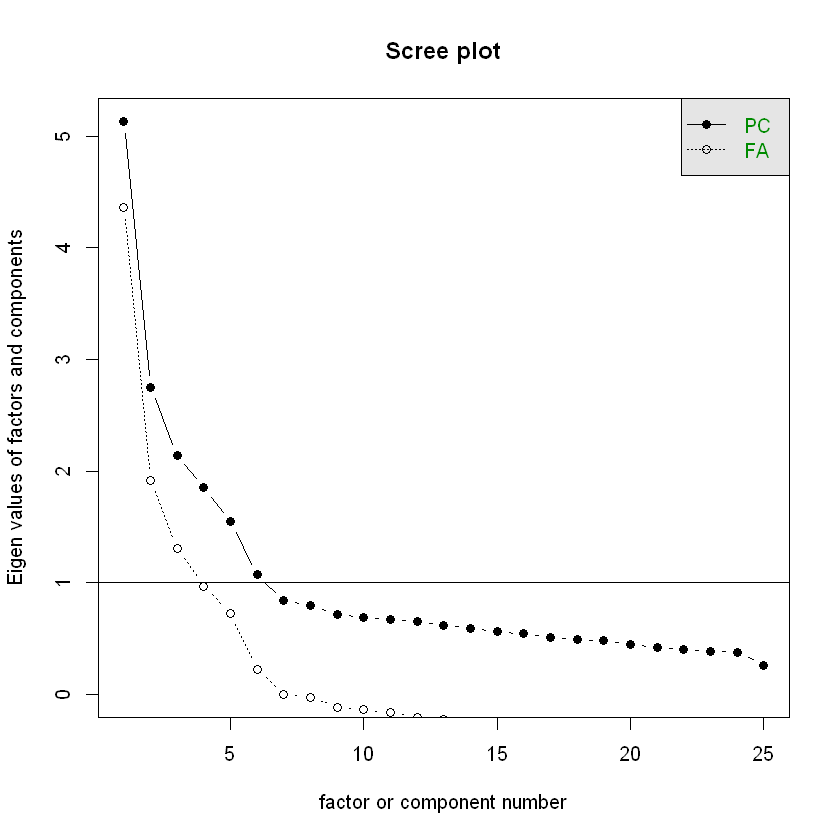

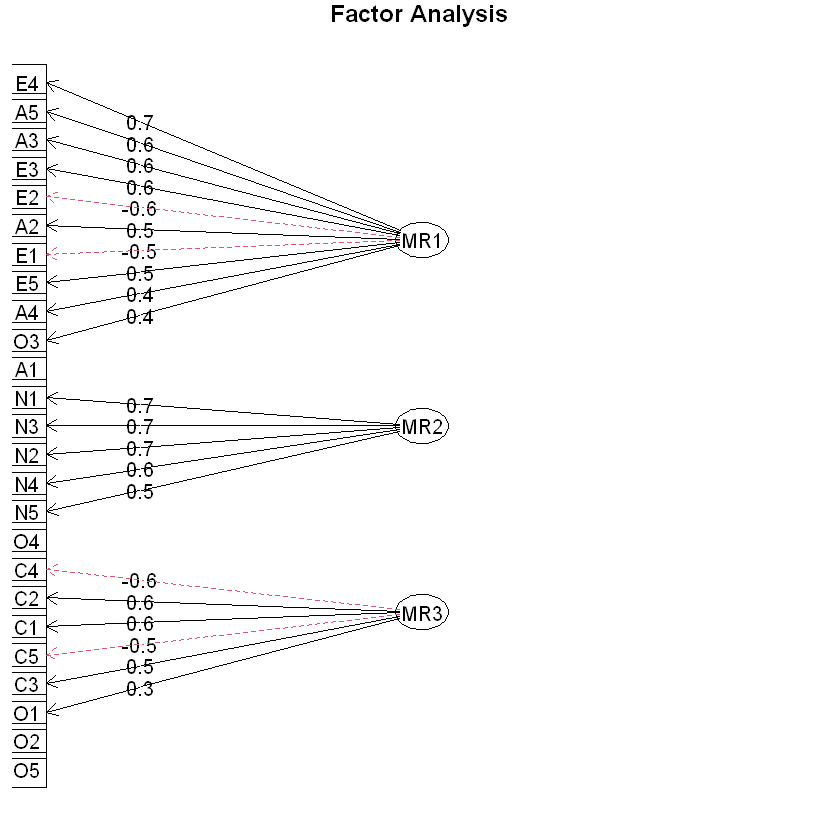

In [17]:
# فراخوانی پکیج‌های مورد نیاز
library(psych)
library(GPArotation)

# 1. دیتاست bfi را از پکیج psych بارگذاری می‌کنیم
data(bfi)

# 2. فقط ۲۵ ستون اول که مربوط به سوالات پرسشنامه است را انتخاب می‌کنیم.
#    همچنین، سطرهای دارای مقدار گمشده (NA) را حذف می‌کنیم تا کد به خطا نخورد.
my_data <- na.omit(bfi[, 1:25])

# فرض می‌کنیم 'my_data' دیتافریم پرسشنامه است
# 1. بررسی مناسب بودن داده‌ها
KMO(my_data)
cortest.bartlett(my_data)

# 2. تعیین تعداد مناسب عامل‌ها با نمودار سنگ‌ریزه
scree(my_data, factors = TRUE)

# 3. انجام تحلیل عاملی با 3 عامل و چرخش Varimax
# چرخش (Rotation) به ساده‌سازی و تفسیرپذیری بهتر عامل‌ها کمک می‌کند
fa_model <- fa(my_data, nfactors = 3, rotate = "varimax")

# مشاهده نتایج و بارهای عاملی
print(fa_model)

# رسم دیاگرام عامل‌ها
fa.diagram(fa_model)

تحلیل: نتایج نشان می‌دهد که کدام سوالات پرسشنامه تحت کدام عامل مشترک قرار می‌گیرند. با بررسی محتوای سوالات هر عامل، می‌توان آن عامل را نام‌گذاری کرد (مثلاً عامل "اجتناب از صمیمیت" یا "اضطراب در رابطه").

بخش چهارم: تحلیل ممیزی خطی (LDA)
مقدمه و تئوری
تحلیل ممیزی (Discriminant Analysis) یک روش طبقه‌بندی (Classification) است. هدف آن، پیدا کردن ترکیبات خطی از متغیرهای پیش‌بین است که به بهترین شکل ممکن گروه‌های مختلف را از یکدیگر جدا (ممیزی) کنند. مدل LDA سپس می‌تواند برای پیش‌بینی عضویت یک مشاهده جدید در یکی از این گروه‌ها استفاده شود.


پیاده‌سازی در R (مثال داده‌های گل زنبق iris)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P

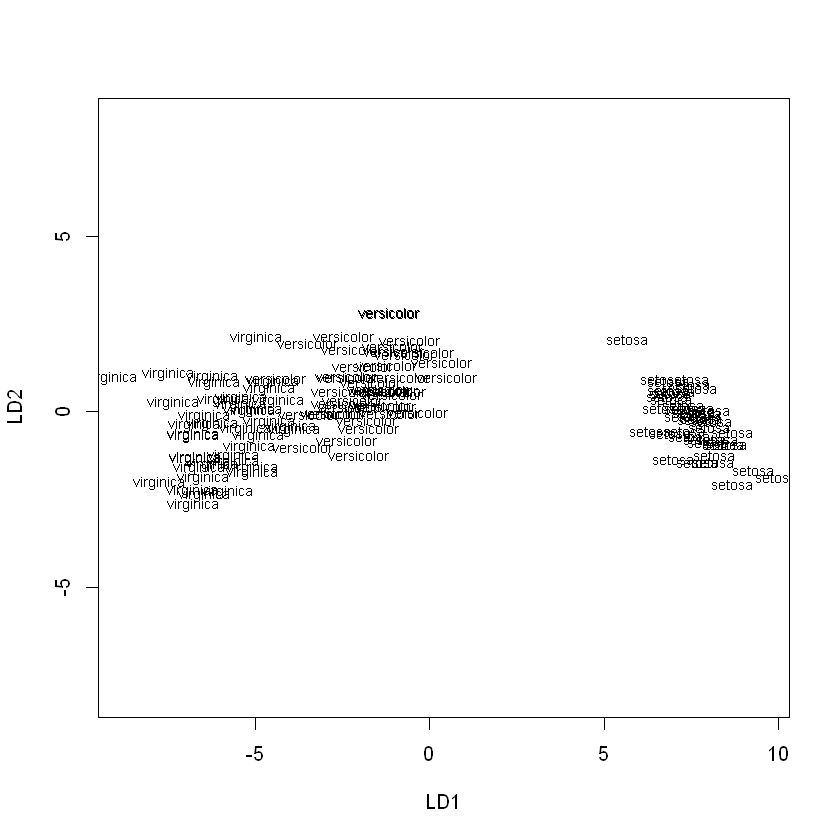

In [18]:
# فراخوانی پکیج مورد نیاز
library(MASS)
library(caret)

# استفاده از دیتاست iris
data <- iris

# 1. تقسیم داده به مجموعه آموزشی و آزمایشی
set.seed(123) # برای تکرارپذیری
training.samples <- createDataPartition(data$Species, p = 0.8, list = FALSE)
train.data <- data[training.samples, ]
test.data <- data[-training.samples, ]

# 2. ساخت مدل LDA روی داده‌های آموزشی
model <- lda(Species ~ ., data = train.data)

# 3. پیش‌بینی روی داده‌های آزمایشی
predictions <- predict(model, test.data)

# 4. ارزیابی دقت مدل با ماتریس درهم‌ریختگی
confusionMatrix(predictions$class, test.data$Species)

# رسم نتایج
plot(model)

تحلیل: خروجی مدل LDA ضرایب ترکیبات خطی (توابع ممیزی) را نشان می‌دهد. ماتریس درهم‌ریختگی نیز دقت مدل در طبقه‌بندی نمونه‌های جدید را مشخص می‌کند. نمودار 

plot(model) به صورت بصری نشان می‌دهد که گروه‌ها تا چه حد توسط توابع ممیزی از هم جدا شده‌اند.